# Electricity Demand and Supply Analysis
#### By: [Samuel Duah Boadi](https://github.com/Adzoy08)

## Introduction

Two cleaned [datasets](https://github.com/OmdenaAI/chennai-india-power-outage/tree/main/src/data/cleaned%20data) were loaded into this notebook to analyse the power demanded and supplied.

One dataset has 11 observations of power demanded and supplied.<br> 
This datasets provides the average power required and met for each year from 2012 to 2022.

The other dataset has 122 observations which was detailed power demanded and supplied.

Even though one dataset has 17 attributes and the other 12 attributes, they all shared 12 similar attributes.

Some of the attributes were:
* Requirement(MU/DAY)
* Energy_met(MU/DAY)
* Surplus(+)/Deficit(-)(MU/DAY)

Meaning of Abbreviations
* MU - Million Unit (unit of energy)
* MW - Megawatt (unit of power)

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load the three datasets
df_monthly = pd.read_csv('data/demand_supply_monthly.csv')
df_yearly = pd.read_csv('data/demand_supply_yearly.csv')

## Assessing Data

In [3]:
print(df_monthly.shape)
df_monthly.head()

(122, 17)


,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,year,month,date_published,month_published,year_published
0,354.0,354.0,-0.9,10632.0,10605.0,-26.0,-0.2,17646.0,17563.0,-83.0,-0.5,Monthly_Report_Apr_2022,2022,4,2022-05-23,5,2022
1,337.0,337.0,0.0,10459.0,10458.0,-1.0,0.0,16906.0,16906.0,0.0,0.0,Monthly_Report_May_2022,2022,5,2022-06-23,6,2022
2,344.0,343.0,-0.3,10657.0,10648.0,-9.0,-0.1,17196.0,17196.0,0.0,0.0,Monthly_Report_Mar_2022,2022,3,2022-04-25,4,2022
3,286.0,286.0,0.0,8873.0,8873.0,1.0,0.0,15290.0,15290.0,0.0,0.0,Monthly_Report_Jan_2022,2022,1,2022-02-23,2,2022
4,245.0,245.0,0.0,7362.0,7360.0,-1.0,0.0,13501.0,13480.0,-21.0,-0.2,Monthly_Report_Nov_2021,2021,11,2021-12-23,12,2021


In [4]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Requirement(MU/DAY)            122 non-null    float64
 1   Energy_met(MU/DAY)             122 non-null    float64
 2   Surplus(+)/Deficit(-)(MU/DAY)  122 non-null    float64
 3   Requirement(MU)                122 non-null    float64
 4   Energy_met(MU)                 122 non-null    float64
 5   Surplus(+)/Deficit(-)(MU)      122 non-null    float64
 6   %Shortage(MU)                  122 non-null    float64
 7   Requirement(MW)                122 non-null    float64
 8   Peak_Demand_Met5(MW)           122 non-null    float64
 9   Surplus(+)/Deficit(-)(MW)      122 non-null    float64
 10  %Shortage(MW)                  122 non-null    float64
 11  name_report                    122 non-null    object 
 12  year                           122 non-null    int

In [5]:
df_monthly.describe()

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),year,month,month_published,year_published
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,283.758197,276.782787,-6.989344,8631.884426,8419.755738,-212.110656,-2.718033,14066.011475,13849.101639,-216.893443,-1.734426,2016.836066,6.467213,6.598361,2017.131148
std,27.948258,36.694300,14.425527,864.073361,1127.604563,438.266568,5.696266,1470.967073,1771.175005,583.523308,4.757991,2.969155,3.447803,3.271868,2.721056
min,217.000000,177.000000,-60.000000,6511.100000,5302.000000,-1860.000000,-24.000000,10161.000000,8518.000000,-3745.000000,-28.000000,2012.000000,1.000000,1.000000,2013.000000
25%,264.500000,254.000000,-7.000000,7994.750000,7759.750000,-216.525000,-2.825000,12969.000000,12732.000000,-161.250000,-1.250000,2014.000000,4.000000,4.000000,2014.000000
50%,280.500000,279.050000,-0.200000,8534.100000,8431.000000,-5.450000,-0.100000,14290.500000,14225.500000,-23.000000,-0.200000,2017.000000,6.000000,7.000000,2017.000000
75%,302.875000,302.800000,0.000000,9201.150000,9201.650000,-0.750000,0.000000,15024.500000,15007.250000,0.000000,0.000000,2019.000000,9.000000,9.000000,2019.000000
max,354.000000,354.000000,0.100000,10657.000000,10648.000000,3.000000,0.000000,17646.000000,17563.000000,2360.000000,20.700000,2022.000000,12.000000,12.000000,2022.000000


In [6]:
print(df_yearly.shape)
df_yearly.head()

(11, 12)


,year,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW)
0,2012,251.555556,207.555556,-44.222222,68906.0,56813.0,-12093.0,-17.777778,106715.0,92862.0,-13853.0,-12.666667
1,2013,256.416667,232.750000,-23.750000,93856.0,85185.0,-8671.0,-9.141667,145122.0,137615.0,-7507.0,-5.216667
2,2014,268.375000,259.991667,-8.383333,97625.1,94603.6,-3021.6,-3.066667,154358.4,153581.4,-776.0,-0.308333
3,2015,267.416667,263.283333,-4.125000,97604.2,96106.1,-1497.9,-1.500000,159628.0,156531.0,-3096.0,-1.891667
4,2016,293.458333,293.416667,-0.050000,107373.0,107357.4,-15.6,-0.008333,173636.0,173521.0,-115.0,-0.066667


In [7]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           11 non-null     int64  
 1   Requirement(MU/DAY)            11 non-null     float64
 2   Energy_met(MU/DAY)             11 non-null     float64
 3   Surplus(+)/Deficit(-)(MU/DAY)  11 non-null     float64
 4   Requirement(MU)                11 non-null     float64
 5   Energy_met(MU)                 11 non-null     float64
 6   Surplus(+)/Deficit(-)(MU)      11 non-null     float64
 7   %Shortage(MU)                  11 non-null     float64
 8   Requirement(MW)                11 non-null     float64
 9   Peak_Demand_Met5(MW)           11 non-null     float64
 10  Surplus(+)/Deficit(-)(MW)      11 non-null     float64
 11  %Shortage(MW)                  11 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 1.2 KB


In [8]:
df_yearly.describe()

,year,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2017.000000,285.404293,277.946717,-7.477626,95735.445455,93382.745455,-2352.50000,-2.919343,156004.854545,153599.127273,-2405.545455,-1.896212
std,3.316625,23.082091,34.661913,14.118460,19342.577534,21364.526086,4148.59995,5.636614,32931.173861,35368.054508,4417.023599,3.897348
min,2012.000000,251.555556,207.555556,-44.222222,49649.000000,49612.000000,-12093.00000,-17.777778,83300.000000,83217.000000,-13853.000000,-12.666667
25%,2014.500000,267.895833,261.637500,-6.254167,95730.100000,89894.300000,-2259.75000,-2.283333,149740.200000,145598.200000,-1936.000000,-1.100000
50%,2017.000000,288.566667,288.425000,-0.258333,103137.000000,103156.000000,-94.10000,-0.100000,172805.000000,172627.000000,-199.000000,-0.116667
75%,2019.500000,298.779167,298.629167,-0.083333,107803.000000,107791.200000,-25.30000,-0.020833,176933.000000,176656.500000,-118.000000,-0.087500
max,2022.000000,328.600000,328.400000,0.050000,111507.000000,111092.000000,18.00000,0.000000,185034.000000,184835.000000,-83.000000,-0.058333


## Exploratory Data Analysis

In [9]:
# merge 'year' and 'month' columns to 'date'
# 'date' column to datetime data type

df_monthly['date'] = pd.to_datetime(df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str) + '-1', format='%Y-%m')

# sort dataframe by 'date'
df_monthly = df_monthly.sort_values(by="date")

In [10]:
def require_met_plot(x, y, title):
    '''
    A function to plot a multivariate visualization 
    in two plots but one figure.
    Each plot plots two quantitative variables to compare.
    The left plot is from a dataframe with attributes for each month across the year
    whiles the right plot is from another dataframe with attributes per year.
    
    Parameters:  x & y (str)  ->  two quantitative variables
                                 One varible representing the Required MU/MW needed and
                                 the other representing the MU/MW met
                                 
                tite (str)  ->  specify whether 'MU per Day', 'MU' 
                                or 'MW' for appropriate descriptive title and label
                             
    return:    two plots in one figure  
    '''
    # remove 'per Day' from title for y-label
    if len(title) >= 3:
        y_label = title[:2]
    else:
        y_label = title
    
    plt.figure(figsize = [20, 5])

    #  LEFT plot: Detail visual by month and year
    plt.subplot(1, 2, 1)
    plt.plot(df_monthly['date'], df_monthly[x], label=x)
    plt.plot(df_monthly['date'], df_monthly[y], label=y)
    plt.xlabel('time period')
    plt.ylabel(y_label)
    plt.title('The ' + title + ' Required & Met Monthly', weight='bold');
    plt.legend();

    # RIGHT plot: visual by year only
    plt.subplot(1, 2, 2)
    plt.plot(df_yearly['year'], df_yearly[x], label=x)
    plt.plot(df_yearly['year'], df_yearly[y], label=y)
    plt.xlabel('time period')
    plt.ylabel(y_label)
    plt.title('The ' + title + ' Required & Met Yearly', weight='bold');
    plt.legend();
    
    
def surplus_deficit_plot(y, title):
    '''
    A function to plot a bivariate visualization in two plots but one figure.
    Each plots gives the surplus or deficit when the Required MU/MW and the MU/MW met 
    are summed. 
    The left plot is from a dataframe with attributes for each month across the year
    whiles the right plot is from another dataframe with attributes per year.
    
    Parameters:  y (str)    ->  a quantitative varible
                                the surplus/deficit
                 
                tite (str)  ->  specify whether 'MU per Day', 'MU' 
                                or 'MW' for appropriate descriptive title       
                        
                             
    return:    two plots in one figure  
    '''

    plt.figure(figsize = [20, 5])

    #  LEFT plot: Detail visual by month
    plt.subplot(1, 2, 1)
    plt.errorbar(data=df_monthly, x='date', y=y)
    plt.xlabel('time period')
    plt.ylabel('surplus / deficit')
    plt.title('The Surplus/Deficit of ' + title +' Monthly', weight='bold');

    # RIGHT plot: visual by year
    plt.subplot(1, 2, 2)
    plt.errorbar(data=df_yearly, x='year', y=y)
    plt.xlabel('time period')
    plt.ylabel('surplus / deficit')
    plt.title('The Surplus/Deficit of ' + title +' Yearly', weight='bold');

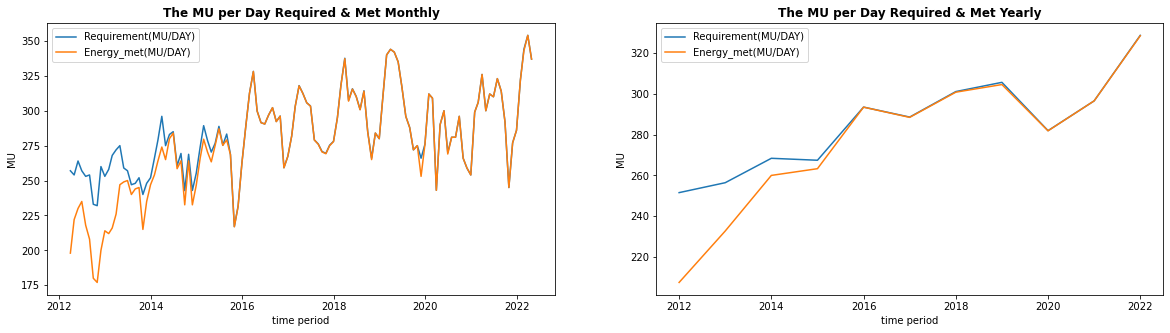

In [11]:
require_met_plot('Requirement(MU/DAY)', 'Energy_met(MU/DAY)', 'MU per Day')

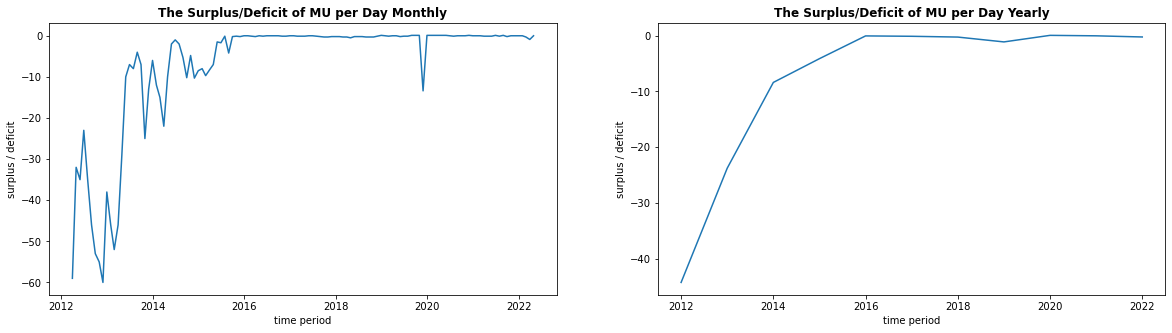

In [12]:
surplus_deficit_plot('Surplus(+)/Deficit(-)(MU/DAY)', 'MU per Day')

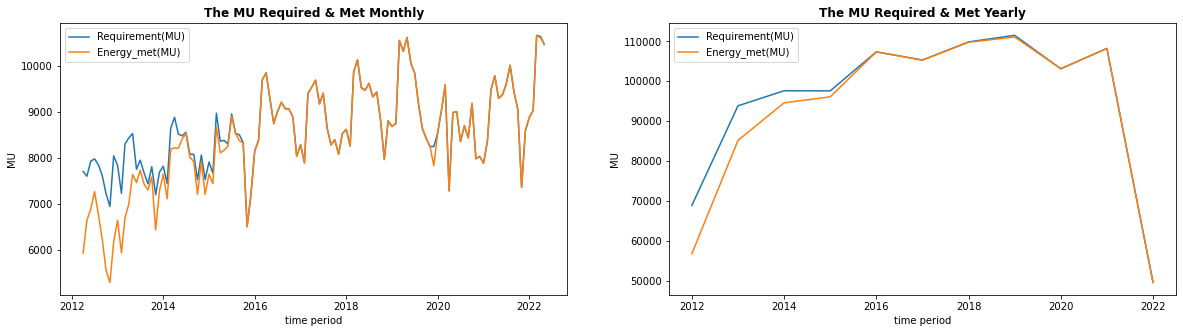

In [13]:
require_met_plot('Requirement(MU)', 'Energy_met(MU)', 'MU')

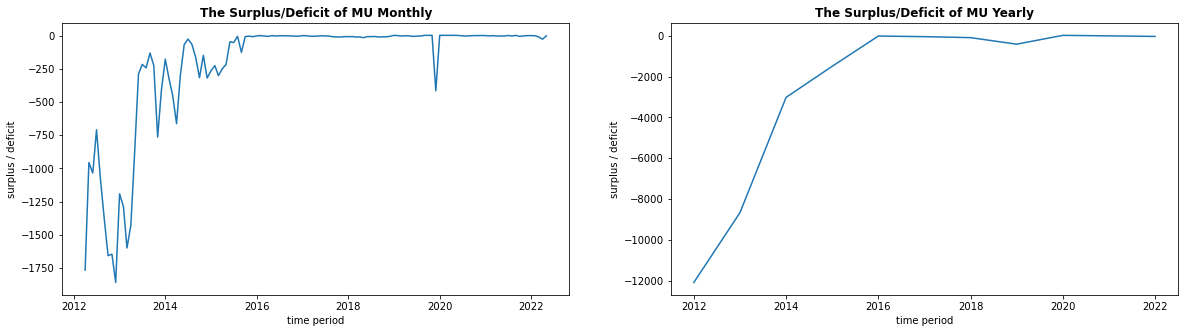

In [14]:
surplus_deficit_plot('Surplus(+)/Deficit(-)(MU)', 'MU')

> Prior to 2016, the energy provided could not meet the required MU (per day).<br> 
From 2016 to 2022, even though the energy met was less than the required MU (per day), it was close to 0.<br>
December 2019 had a significant deficit of -13.4 since 2016.

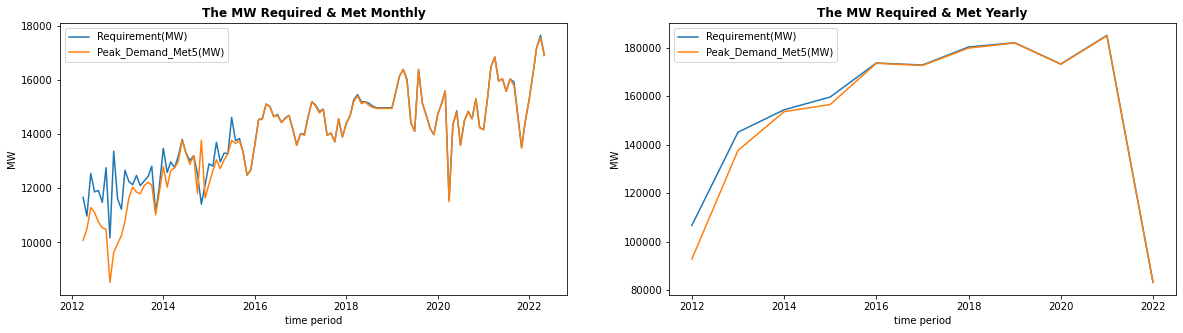

In [15]:
require_met_plot('Requirement(MW)', 'Peak_Demand_Met5(MW)', 'MW')

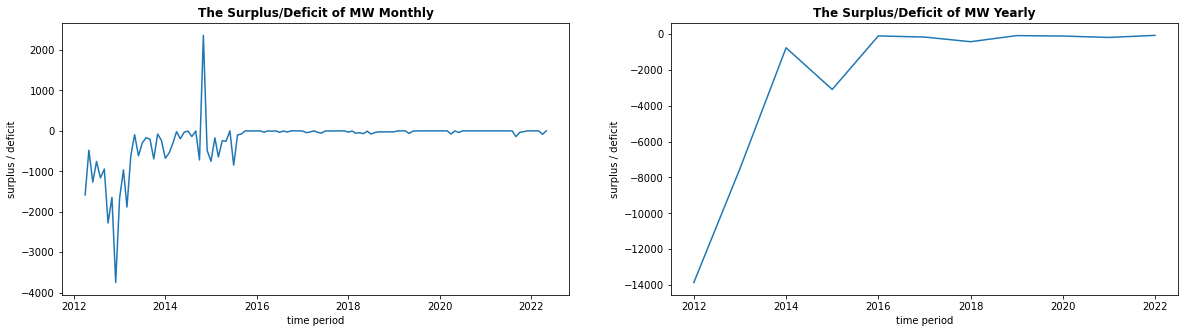

In [16]:
surplus_deficit_plot('Surplus(+)/Deficit(-)(MW)', 'MW')

> Prior to 2016, there has been significant deficit and surplus of MW.<br>
November 2012 saw the lowest MW supplied with a deficit of -1643.0.<br>
November 2014 saw the highest surplus of MW (2360.0).<br>
The highest MW (17563.0) provided was in April 2022 but had a deficit of -83.0.